In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('./data/train.csv')
X_test = pd.read_csv('./data/test.csv')

X_train = train.drop('SalePrice',axis=1).copy()
y_train = train['SalePrice']

In [3]:
print(X_train.shape)
print(X_test.shape)

train

(1460, 80)
(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


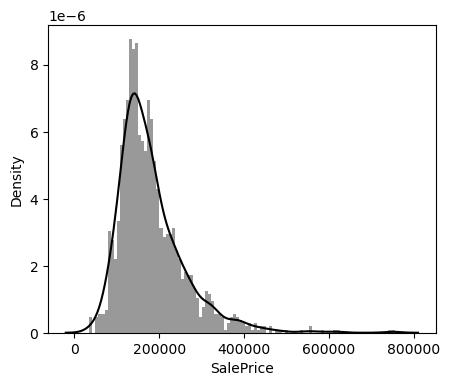

In [4]:
print(train['SalePrice'].describe())
plt.figure(figsize=(5, 4))
sns.distplot(train['SalePrice'], color='k', bins=100, hist_kws={'alpha': 0.4});

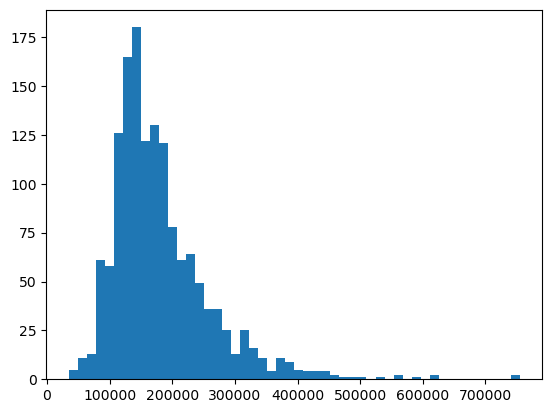

In [5]:
plt.hist(train['SalePrice'],bins=50)
print()

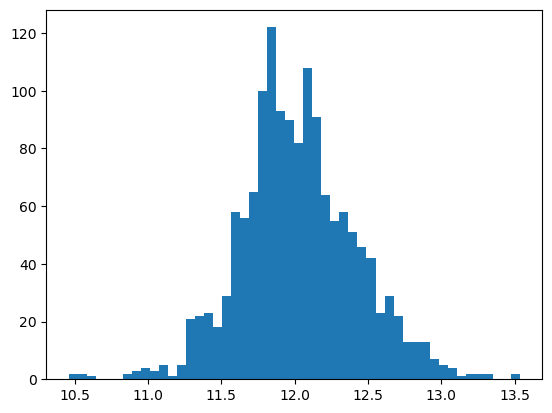

In [6]:
plt.hist(train['SalePrice'].apply(lambda x: np.log(x)),bins=50)
print()

In [7]:
def transform_X(X):

    # maps categorical values to natural ordering
    quality_map = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}
    exposure_map = {'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0}
    fintype_map = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0}
    functional_map = {'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,'Maj2':2,'Sev':1,'Sal':0}
    garage_map = {'Fin':3,'RFn':2,'Unf':1,'NA':0}

    # 1 hot encoding
    transformed = pd.get_dummies(X, columns=['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour',
                                            'Utilities','LotConfig','LandSlope','Neighborhood','Condition1',
                                            'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',
                                            'Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating',
                                            'Electrical','GarageType','SaleType','SaleCondition','PavedDrive','Fence'])

    # convert to numerical rating scale based on maps above
    transformed['ExterQual'].replace(quality_map,inplace=True)
    transformed['ExterCond'].replace(quality_map,inplace=True)
    transformed['BsmtQual'].replace(quality_map,inplace=True)
    transformed['BsmtCond'].replace(quality_map,inplace=True)
    transformed['BsmtExposure'].replace(exposure_map,inplace=True)
    transformed['BsmtFinType1'].replace(fintype_map,inplace=True)
    transformed['BsmtFinType2'].replace(fintype_map,inplace=True)
    transformed['HeatingQC'].replace(quality_map,inplace=True)
    transformed['KitchenQual'].replace(quality_map,inplace=True)
    transformed['Functional'].replace(functional_map,inplace=True)
    transformed['FireplaceQu'].replace(quality_map,inplace=True)
    transformed['GarageQual'].replace(quality_map,inplace=True)
    transformed['GarageCond'].replace(quality_map,inplace=True)
    transformed['GarageFinish'].replace(garage_map,inplace=True)
    transformed['CentralAir'] = transformed['CentralAir'].apply(lambda x: 1 if x == 'Y' else 0)

    # TODO need to deal with these properly. create columns and fill with respective values
    transformed.drop('MiscFeature',axis=1,inplace=True)
    transformed.drop('MiscVal',axis=1,inplace=True)

    # TODO fix. lots of NaN values. dropping these columns
    transformed.drop('PoolQC',axis=1,inplace=True)
    transformed.drop('LotFrontage',axis=1,inplace=True)
    transformed.drop('FireplaceQu',axis=1,inplace=True)
    
    # TODO fix. filling remaining NaN values with average for the column
    for col in transformed.columns:
        transformed[col].fillna(transformed[col].mean(),inplace=True)
    
    return transformed.copy()

In [8]:
# xgboost can handle missing data directly, so don't exclude it
def transform_X_XGBoost(X):

    # maps categorical values to natural ordering
    quality_map = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}
    exposure_map = {'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0}
    fintype_map = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0}
    functional_map = {'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,'Maj2':2,'Sev':1,'Sal':0}
    garage_map = {'Fin':3,'RFn':2,'Unf':1,'NA':0}

    # 1 hot encoding
    transformed = pd.get_dummies(X, columns=['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour',
                                            'Utilities','LotConfig','LandSlope','Neighborhood','Condition1',
                                            'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',
                                            'Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating',
                                            'Electrical','GarageType','SaleType','SaleCondition','PavedDrive',
                                             'Fence','MiscFeature'])

    # convert to numerical rating scale based on maps above
    transformed['ExterQual'].replace(quality_map,inplace=True)
    transformed['ExterCond'].replace(quality_map,inplace=True)
    transformed['BsmtQual'].replace(quality_map,inplace=True)
    transformed['BsmtCond'].replace(quality_map,inplace=True)
    transformed['BsmtExposure'].replace(exposure_map,inplace=True)
    transformed['BsmtFinType1'].replace(fintype_map,inplace=True)
    transformed['BsmtFinType2'].replace(fintype_map,inplace=True)
    transformed['HeatingQC'].replace(quality_map,inplace=True)
    transformed['KitchenQual'].replace(quality_map,inplace=True)
    transformed['Functional'].replace(functional_map,inplace=True)
    transformed['FireplaceQu'].replace(quality_map,inplace=True)
    transformed['GarageQual'].replace(quality_map,inplace=True)
    transformed['GarageCond'].replace(quality_map,inplace=True)
    transformed['GarageFinish'].replace(garage_map,inplace=True)
    transformed['CentralAir'] = transformed['CentralAir'].apply(lambda x: 1 if x == 'Y' else 0)

    # fill each column with the corresponding value in MiscVal. fill rest with 0s
    misc_cols = ['MiscFeature_Gar2', 'MiscFeature_Othr', 'MiscFeature_Shed', 'MiscFeature_TenC']
    transformed[misc_cols] = transformed[misc_cols].astype(int).multiply(transformed['MiscVal'], axis=0)

    # these values are now populated in the corresponding misc_cols
    transformed.drop('MiscVal',axis=1,inplace=True)
    
    return transformed.copy()

In [9]:
X_train_transformed = transform_X(X_train)
X_train_transformed['SalePrice'] = y_train

X_test_transformed = transform_X(X_test)

X_train_transformed.to_csv('./data/train_transformed.csv',index=False)
X_test_transformed.to_csv('./data/test_transformed.csv',index=False)

In [10]:
# for xgboost

X_train_transformed = transform_X_XGBoost(X_train)
X_train_transformed['SalePrice'] = y_train # use log transform

X_test_transformed = transform_X(X_test)

X_train_transformed.to_csv('./data/train_transformed_xgb.csv',index=False)
X_test_transformed.to_csv('./data/test_transformed_xgb.csv',index=False)